In [5]:
#main imports
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import acquire
import os
import scipy
import scipy.stats as stats
import sklearn.impute as simpleImputer

#partial imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,PolynomialFeatures,QuantileTransformer
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import RFE, f_regression, SelectKBest

#custom imports
import acquire

In [6]:
df = acquire.get_zguide()
df.head(3)

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [7]:
df.drop(columns=["sale_id","store_id","item_id","item","item_upc12","item_upc14"],inplace=True)
df.head(3)

,sale_amount,sale_date,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84


In [8]:
df.shape,df.isnull().sum()

((913000, 10),
 sale_amount      0
 sale_date        0
 store            0
 store_address    0
 store_city       0
 store_state      0
 store_zipcode    0
 item_brand       0
 item_name        0
 item_price       0
 dtype: int64)

In [9]:
print("store ids =", df.store.unique(),
      "| store cities =", df.store_city.unique(),
      "| store states =", df.store_state.unique())

store ids = [ 1  2  3  4  5  6  7  8  9 10] | store cities = ['San Antonio'] | store states = ['TX']


In [10]:
print("sale amount count =",df.sale_amount.nunique(),
      "sale date count =",df.sale_date.nunique())

sale amount count = 213 sale date count = 1826


In [11]:
print("item brand count =", df.item_brand.nunique(),
      "| item name count =", df.item_name.nunique(),
      "| item_price count =", df.item_price.nunique())

item brand count = 49 | item name count = 50 | item_price count = 47


In [12]:
df.head(2)

,sale_amount,sale_date,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84


In [13]:
df.sale_date = df.sale_date.str.replace("00:00:00 GMT","")
df.sale_date = df.sale_date.str.strip()


# Convert date column to datetime format. Set the index to be the datetime variable.

In [14]:
df.sale_date[0]

'Tue, 01 Jan 2013'

In [15]:
df.sale_date = pd.to_datetime(df.sale_date,format="%a, %d %b %Y")
df = df.set_index("sale_date").sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   store          913000 non-null  int64  
 2   store_address  913000 non-null  object 
 3   store_city     913000 non-null  object 
 4   store_state    913000 non-null  object 
 5   store_zipcode  913000 non-null  int64  
 6   item_brand     913000 non-null  object 
 7   item_name      913000 non-null  object 
 8   item_price     913000 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 69.7+ MB


/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_49183/3957287172.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample("D").sum().sale_amount.plot()


Text(0.5, 1.0, 'Sale over time')

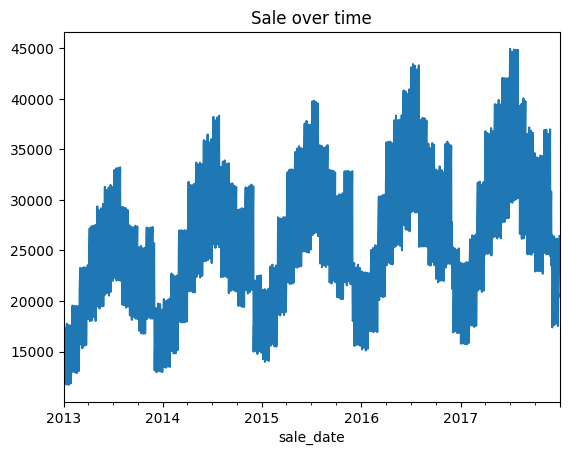

In [16]:
df.resample("D").sum().sale_amount.plot()
plt.title("Sale over time")

In [17]:
df.store.value_counts()

1     91300
7     91300
8     91300
9     91300
10    91300
6     91300
2     91300
5     91300
3     91300
4     91300
Name: store, dtype: int64

In [18]:
df.item_name.value_counts().sort_index()

Ahold Cocoa Almonds                                                                                  18260
Amys Light & Lean Spaghetti Italiano                                                                 18260
Back To Nature Gluten Free White Cheddar Rice Thin Crackers                                          18260
Barefoot Pinot Grigio  187                                                                           18260
Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal                                        18260
Betty Crocker Twin Pack Real Potatoes Scalloped 2 Pouches For 2 Meals - 2 Pk                         18260
Boars Head Sliced White American Cheese - 120 Ct                                                     18260
Burts Bees Daily Moisturizing Cream Sensitive                                                        18260
Careone Family Comb Set - 8 Ct                                                                       18260
Caress Velvet Bliss Ultra Silkening B

# Plot the distribution of sale_amount and item_price.

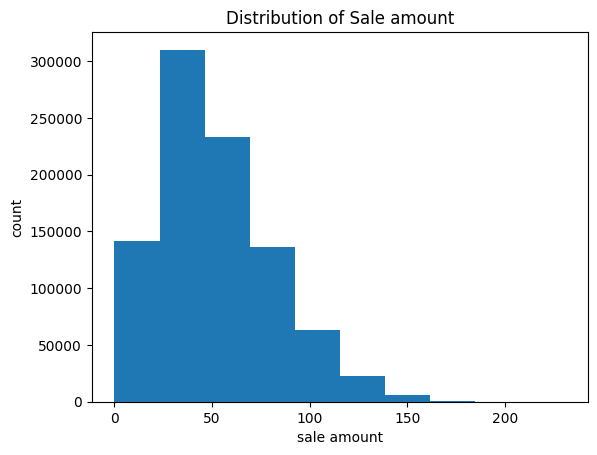

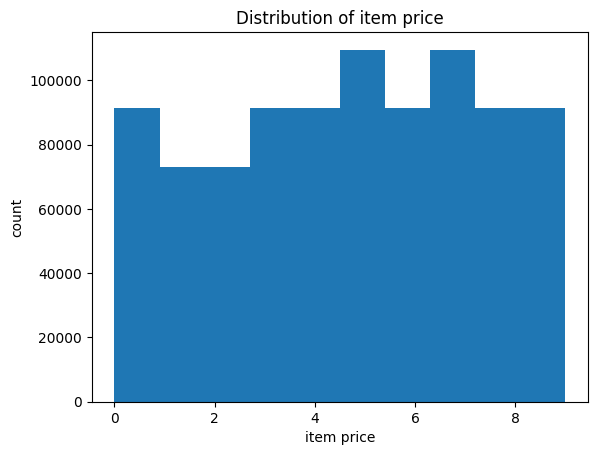

In [19]:
plt.hist(x=df["sale_amount"])
plt.xlabel("sale amount")
plt.ylabel("count")
plt.title("Distribution of Sale amount")
plt.show()

plt.hist(x=df["item_price"].astype(int))
plt.xlabel("item price")
plt.ylabel("count")
plt.title("Distribution of item price")
plt.show()


# Add a 'month' and 'day of week' column to your dataframe.

In [20]:
df["month"] = df.index.month_name()
df["day_of_week"] = df.index.day_name()
df

,sale_amount,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,month,day_of_week
sale_date,,,,,,,,,,,
2013-01-01,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,January,Tuesday
2013-01-01,26.0,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,January,Tuesday
2013-01-01,27.0,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,January,Tuesday
2013-01-01,54.0,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,January,Tuesday
2013-01-01,35.0,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,January,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,21.0,9,735 SW Military Dr,San Antonio,TX,78221,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,December,Sunday
2017-12-31,32.0,10,8503 NW Military Hwy,San Antonio,TX,78231,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,December,Sunday
2017-12-31,55.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,December,Sunday


# Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [21]:
df["sales_total"] = df["sale_amount"] * df["item_price"]
df

,sale_amount,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,
2013-01-01,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,January,Tuesday,10.92
2013-01-01,26.0,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,January,Tuesday,218.40
2013-01-01,27.0,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,January,Tuesday,125.55
2013-01-01,54.0,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,January,Tuesday,453.60
2013-01-01,35.0,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,January,Tuesday,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,21.0,9,735 SW Military Dr,San Antonio,TX,78221,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,December,Sunday,87.57
2017-12-31,32.0,10,8503 NW Military Hwy,San Antonio,TX,78231,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,December,Sunday,133.44
2017-12-31,55.0,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,December,Sunday,285.45


# Make sure all the work that you have done above is reproducible. 
# That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [22]:
def prep_sales():
    ''' 
    no inputs due to desiring direct reproduction
    takes the dataframe from acquiring sales and does:
        drop unused columns
        plots distributions for quick review
        turns the sale_date into datetime format, and makes it the index
        creates month and day of week from datetime
        new feature of sales total
    '''

    #acquires the data and drops features with duplicated inof
    df = acquire.get_zguide()
    df.drop(columns=["sale_id","store_id","item_id","item","item_upc12","item_upc14"],inplace=True)

    df.shape

    print("store ids =", df.store.unique(),
      "| store cities =", df.store_city.unique(),
      "| store states =", df.store_state.unique())

    print("sale amount count =",df.sale_amount.nunique(),
          "| sale date count =",df.sale_date.nunique())
    
    print("item brand count =", df.item_brand.nunique(),
      "| item name count =", df.item_name.nunique(),
      "| item_price count =", df.item_price.nunique())

    #plots some distributions for review
    plt.hist(x=df["sale_amount"])
    plt.xlabel("sale amount")
    plt.ylabel("count")
    plt.title("Distribution of Sale amount")
    plt.show()

    plt.hist(x=df["item_price"].astype(int))
    plt.xlabel("item price")
    plt.ylabel("count")
    plt.title("Distribution of item price")
    plt.show()

    #changes data to datetime and creates features from it
    df.sale_date = df.sale_date.str.replace("00:00:00 GMT","")
    df.sale_date = df.sale_date.str.strip()
    df.sale_date = pd.to_datetime(df.sale_date,format="%a, %d %b %Y")
    df = df.set_index("sale_date").sort_index()    
    df["month"] = df.index.month_name()
    df["day_of_week"] = df.index.day_name()
    df["sales_total"] = df["sale_amount"] * df["item_price"]

    return df
    

store ids = [ 1  2  3  4  5  6  7  8  9 10] | store cities = ['San Antonio'] | store states = ['TX']
sale amount count = 213 | sale date count = 1826
item brand count = 49 | item name count = 50 | item_price count = 47


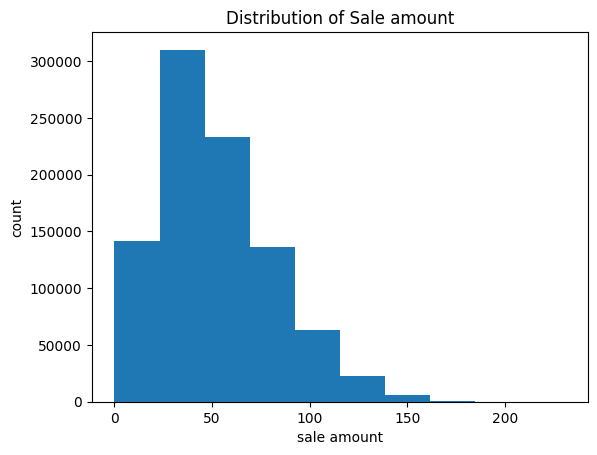

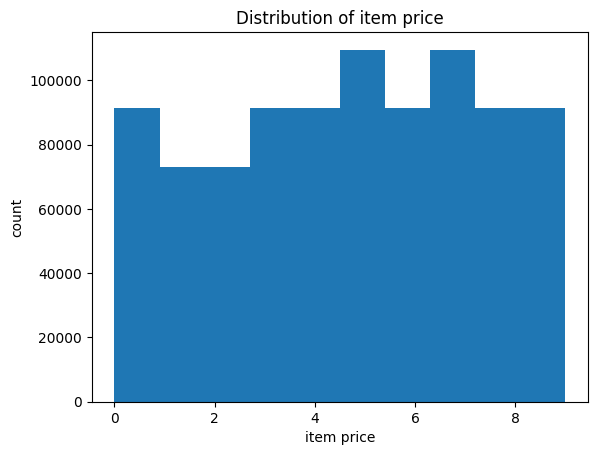

In [23]:
df = prep_sales()

In [24]:
df = acquire.get_opsd_germany()
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


# Convert date column to datetime format.
# Set the index to be the datetime variable.

In [26]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date").sort_index()

# Plot the distribution of each of your variables.

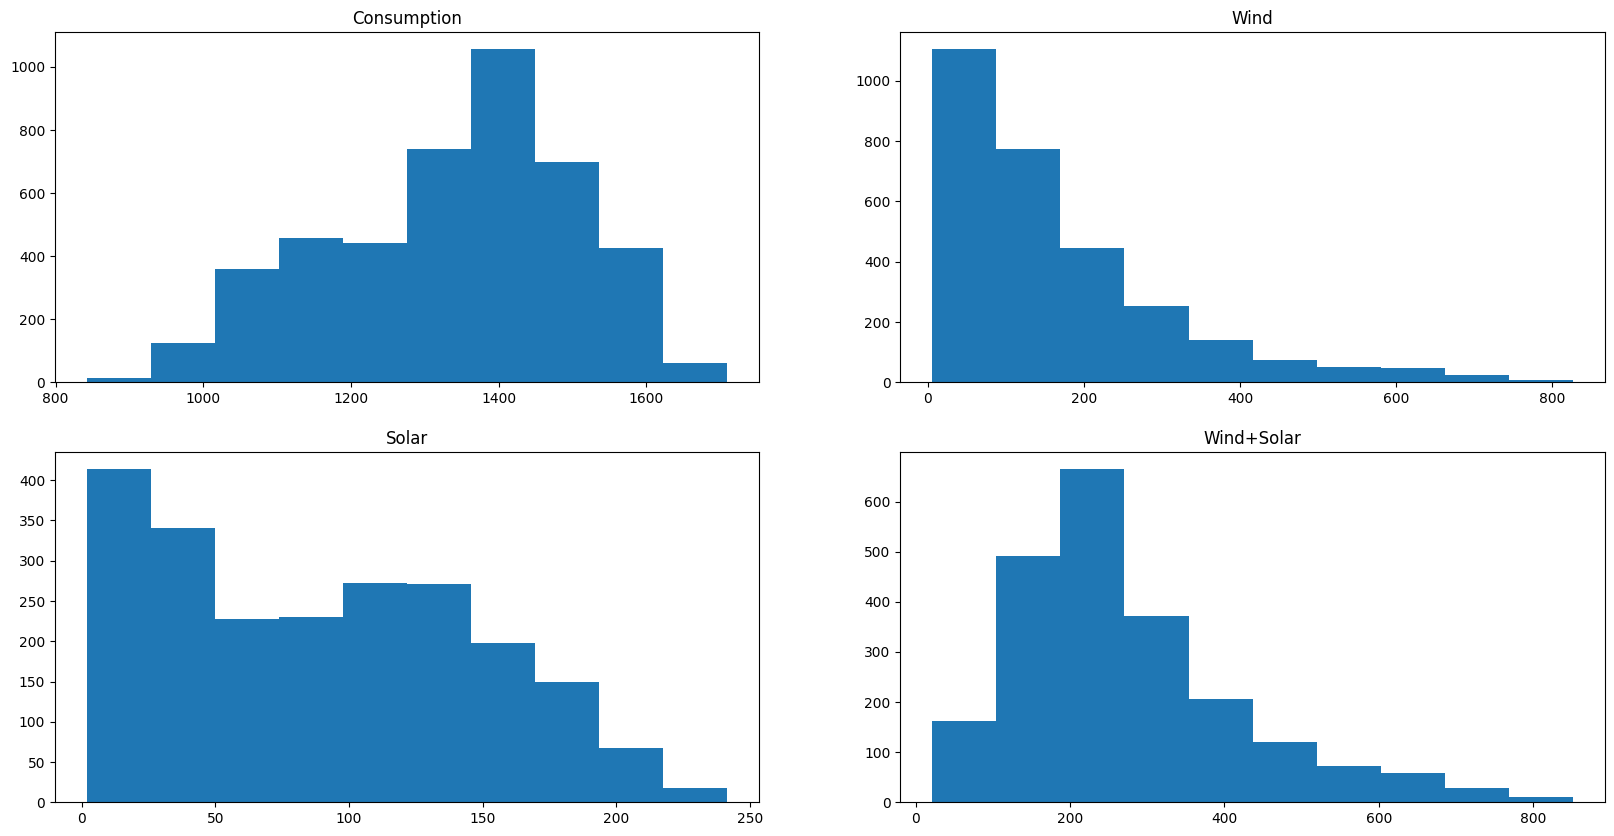

In [27]:

plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns.tolist()): # List of columns
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    plt.subplot(2,int(len(df.columns.tolist())/2), plot_number) # Create subplot.
    plt.title(col) # Title with column name.
    df[col].hist(bins=10) # Display histogram for column.
    plt.grid(False) # Hide gridlines.


# Add a month and a year column to your dataframe.

In [28]:
df["month"] = df.index.month_name()
df["year"] = df.index.year
print("is null\n",df.isnull().sum())
df

is null
 Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64


,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,January,2006
2006-01-02,1380.52100,NaN,NaN,NaN,January,2006
2006-01-03,1442.53300,NaN,NaN,NaN,January,2006
2006-01-04,1457.21700,NaN,NaN,NaN,January,2006
2006-01-05,1477.13100,NaN,NaN,NaN,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


i'm assuming that there was no contribution so no values were tracked

In [29]:
df.fillna(0,inplace=True)
df[df["Wind+Solar"]==0]

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.000,0.000,0.0,January,2006
2006-01-02,1380.521,0.000,0.000,0.0,January,2006
2006-01-03,1442.533,0.000,0.000,0.0,January,2006
2006-01-04,1457.217,0.000,0.000,0.0,January,2006
2006-01-05,1477.131,0.000,0.000,0.0,January,2006
...,...,...,...,...,...,...
2013-03-30,1092.932,20.545,0.000,0.0,March,2013
2013-03-31,1002.856,39.624,0.000,0.0,March,2013
2014-03-12,1516.331,0.000,148.507,0.0,March,2014


In [30]:
def prep_germany_opsd():
    ''' 
    no inputs due to desiring direct reproduction
    takes the dataframe from acquiring german opsd and does:
        plots distributions for quick review
        turns the sale_date into datetime format, and makes it the index
        creates month and day of week from datetime
        new feature of sales total
    '''
    #get data
    df = acquire.get_opsd_germany()

    #send date to index after turning into datetime pandas format
    df.Date = pd.to_datetime(df.Date)
    df = df.set_index("Date").sort_index()

    #plots distribution of all features
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(df.columns.tolist()): # List of columns
        plot_number = i + 1 # i starts at 0, but plot nos should start at 1
        plt.subplot(2,int(len(df.columns.tolist())/2), plot_number) # Create subplot.
        plt.xlabel(col)
        plt.ylabel("count")
        plt.title(f"Count of {col}") # Title with column name.
        df[col].hist(bins=10) # Display histogram for column.
        plt.grid(False) # Hide gridlines.

    #feature engineers and imputes 0 for NaN/Null
    df["month"] = df.index.month_name()
    df["year"] = df.index.year
    print("is null before\n",df.isnull().sum())
    df.fillna(0,inplace=True)
    print("is null after\n",df.isnull().sum())
    
    return df

is null before
 Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64
is null after
 Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64


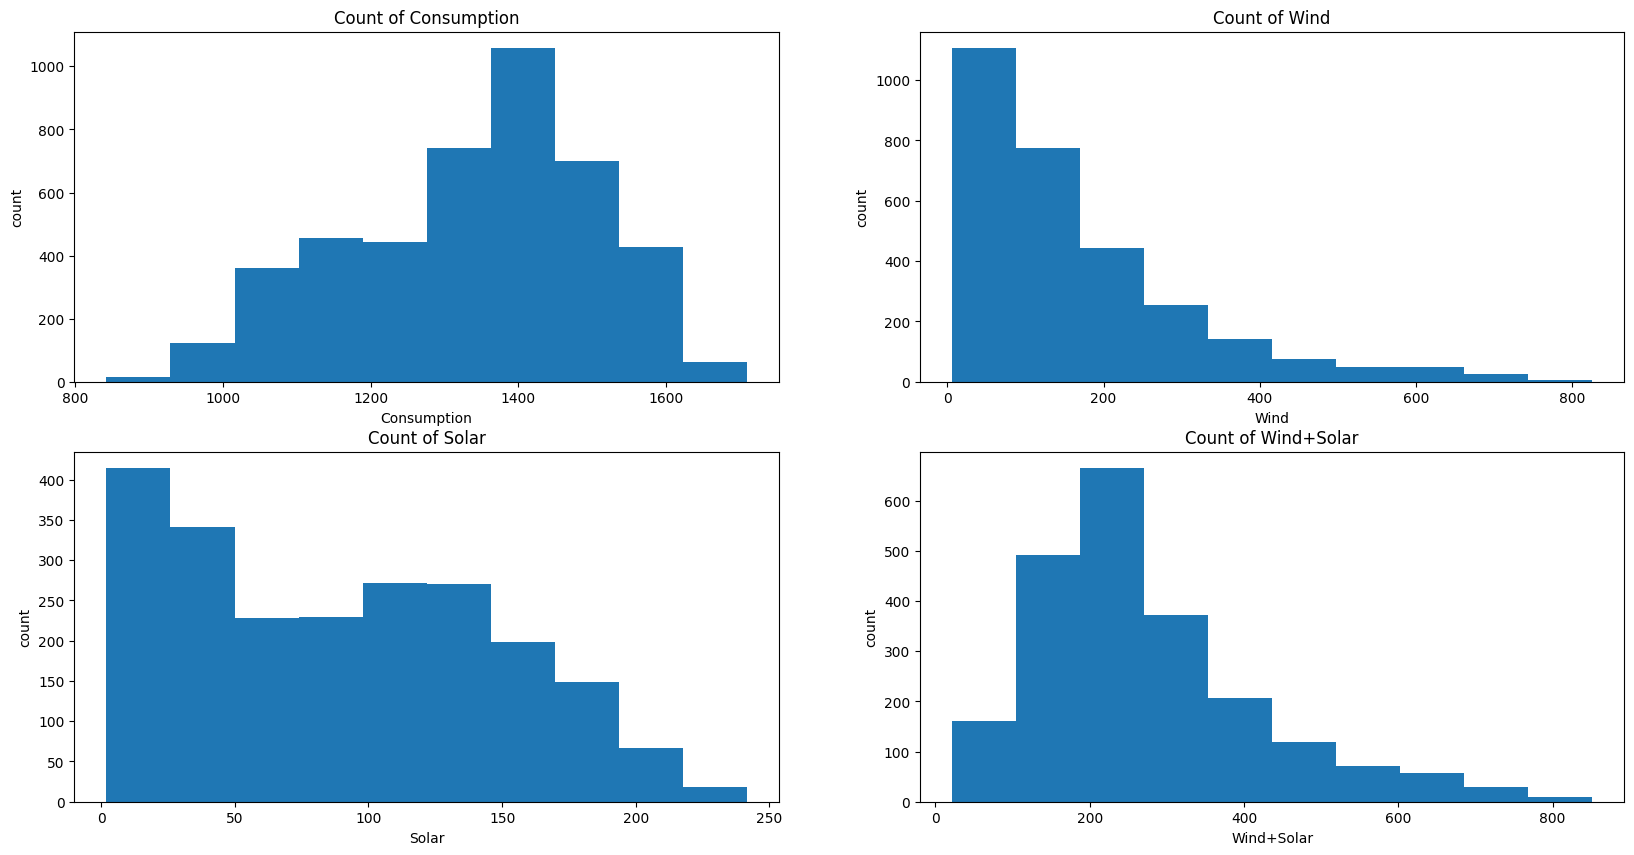

In [31]:
df = prep_germany_opsd()

In [32]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [33]:
os.environ['KMP_DUPLICATE_LIB_OK']

'True'